# Time-Series Forecasting – Stock Prices

Here is Github Link for the project - https://github.com/rashedulemon/TSF_Stock_Prices

## Fetch Dataset from Yahoo Finance 

In [327]:
import datetime
import yfinance as yf
start_date = datetime.datetime(2020, 10, 1)
end_date = datetime.datetime(2025, 9, 1)
meta = yf.Ticker("AAPL")
data = meta.history(start=start_date, end=end_date)

## Export data to CSV file

In [328]:
data.to_csv("../data/AAPL_stock_data.csv")
print("Data exported to ../data/AAPL_stock_data.csv")
print(f"File saved with {len(data)} rows and {len(data.columns)} columns")

Data exported to ../data/AAPL_stock_data.csv
File saved with 1234 rows and 7 columns


## Importing libreries 

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Preprocessing

In [ ]:
df = pd.read_csv("../data/AAPL_stock_data.csv") #load dataset
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-10-01 00:00:00-04:00,114.430515,114.508334,112.669898,113.603706,116120400,0.0,0.0
1,2020-10-02 00:00:00-04:00,109.810111,112.222454,109.158392,109.936562,144712000,0.0,0.0
2,2020-10-05 00:00:00-04:00,110.802282,113.467526,110.452103,113.321617,106243800,0.0,0.0
3,2020-10-06 00:00:00-04:00,112.543451,112.951998,109.187577,110.072754,161498200,0.0,0.0
4,2020-10-07 00:00:00-04:00,111.492912,112.397540,111.016275,111.940361,96849000,0.0,0.0


In [ ]:
df = df.drop(['Dividends', 'Stock Splits'], axis=1) #drop unnecessary column
# Convert to datetime and then extract just the date part
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.strftime('%Y-%m-%d') #convert date data to date time format so we can train model on time series
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-10-01,114.430515,114.508334,112.669898,113.603706,116120400
1,2020-10-02,109.810111,112.222454,109.158392,109.936562,144712000
2,2020-10-05,110.802282,113.467526,110.452103,113.321617,106243800
3,2020-10-06,112.543451,112.951998,109.187577,110.072754,161498200
4,2020-10-07,111.492912,112.397540,111.016275,111.940361,96849000


In [ ]:
df.set_index('Date',inplace=True) #set date as index

In [ ]:
df.info() #see if there are any missing value

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, 2020-10-01 to 2025-08-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1234 non-null   float64
 1   High    1234 non-null   float64
 2   Low     1234 non-null   float64
 3   Close   1234 non-null   float64
 4   Volume  1234 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.8+ KB


There is no missing value.

## Visualize the trends 

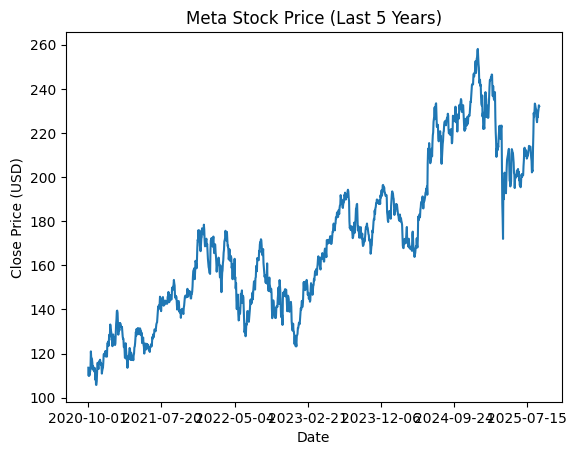

In [334]:
df['Close'].plot(title="Meta Stock Price (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.show()

Plot above shows that the price of the stock increases over time. 

## Model Implementation

### Traditional statistical model ARIMA

To apply the ARIMA model we have to check the data is stationary or not.

In [ ]:
from statsmodels.tsa.stattools import adfuller

values = df['Close'].values
result = adfuller(values) #applying adfuller to determin the dataset is stationary or not

print('Augmneted Dickey_fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])

print('critical values at different levels:') #see critical values
for k, v in result[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -1.428009
p-value: 0.568777
critical values at different levels:
	1%: -3.436
	5%: -2.864
	10%: -2.568

p-value: 0.568777
critical values at different levels:
	1%: -3.436
	5%: -2.864
	10%: -2.568




Result: The data is NOT stationary

p-value (0.568777) > 0.05: We fail to reject the null hypothesis of non-stationarity
ADF statistic (-1.428) is greater than critical values, indicating non-stationarity
This is expected for stock prices, which typically show trends and don't revert to a constant mean


In [ ]:
df['Close_diff'] = df['Close'] - df['Close'].shift(1) #finding dfference to make it stationary 
df['Close'].shift(1)

Date
2020-10-01           NaN
2020-10-02    113.603706
2020-10-05    109.936562
2020-10-06    113.321617
2020-10-07    110.072754
                 ...    
2025-08-25    227.759995
2025-08-26    227.160004
2025-08-27    229.309998
2025-08-28    230.490005
2025-08-29    232.559998
Name: Close, Length: 1234, dtype: float64

In [337]:
values = df['Close_diff'].dropna().values
result1 = adfuller(values)

print('Augmented Dickey-Fuller Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])

print('critical values at different levels:')
for k, v in result1[4].items():
    print('\t%s: %.3f' % (k, v))

Augmented Dickey-Fuller Statistic: -20.701979
p-value: 0.000000
critical values at different levels:
	1%: -3.436
	5%: -2.864
	10%: -2.568


<Axes: xlabel='Date'>

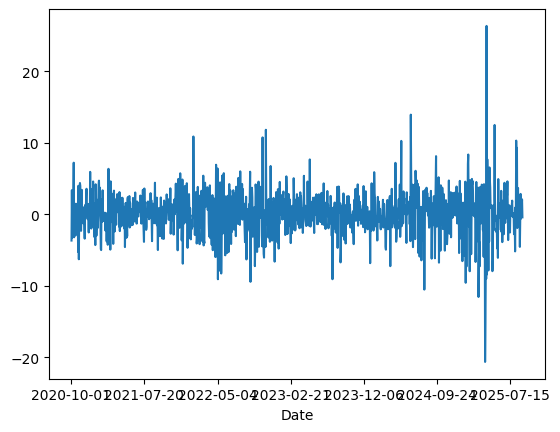

In [338]:
# let's plot to see the difference
df['Close_diff'].plot()

see the autocorellation and corelation

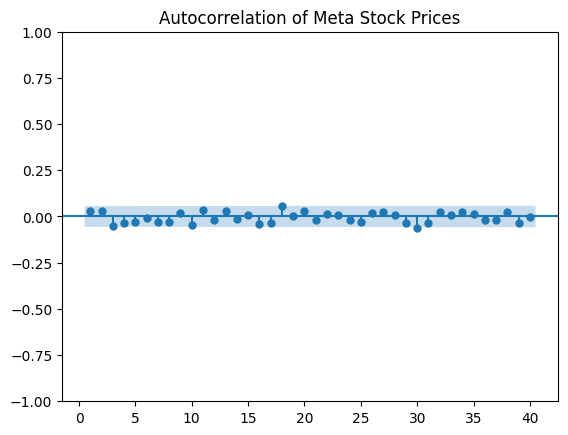

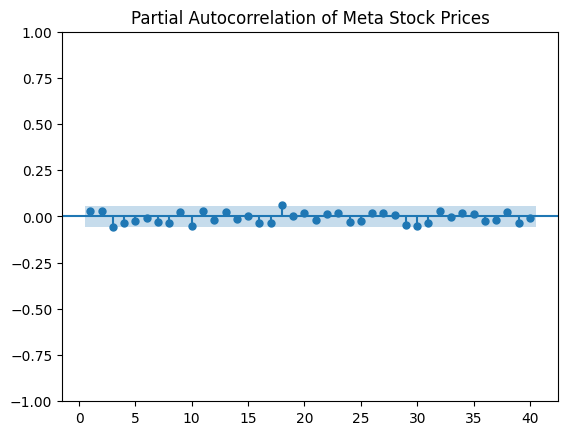

In [339]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plot_acf(df['Close_diff'].iloc[13:],lags=40
               ,title="Autocorrelation of Meta Stock Prices"
               ,zero=False
               )
fig = plot_pacf(df['Close_diff'].iloc[13:],lags=40
                ,title="Partial Autocorrelation of Meta Stock Prices"
                ,zero=False
                )

train arima model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Close'],order=(1,1,1)) #setup model using p=1 q=1 r=1
model_fit=model.fit()

In [ ]:
model_fit.summary() #train model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1234
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3119.754
Date:                Wed, 01 Oct 2025   AIC                           6245.509
Time:                        23:31:57   BIC                           6260.860
Sample:                             0   HQIC                          6251.284
                               - 1234                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2278      0.594      0.383      0.701      -0.937       1.392
ma.L1         -0.1983      0.599     -0.331      0.740      -1.372       0.975
sigma2         9.2308      0.189     48.862      0.000       8.861       9.601
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3176.29
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(len(df)) 

1234


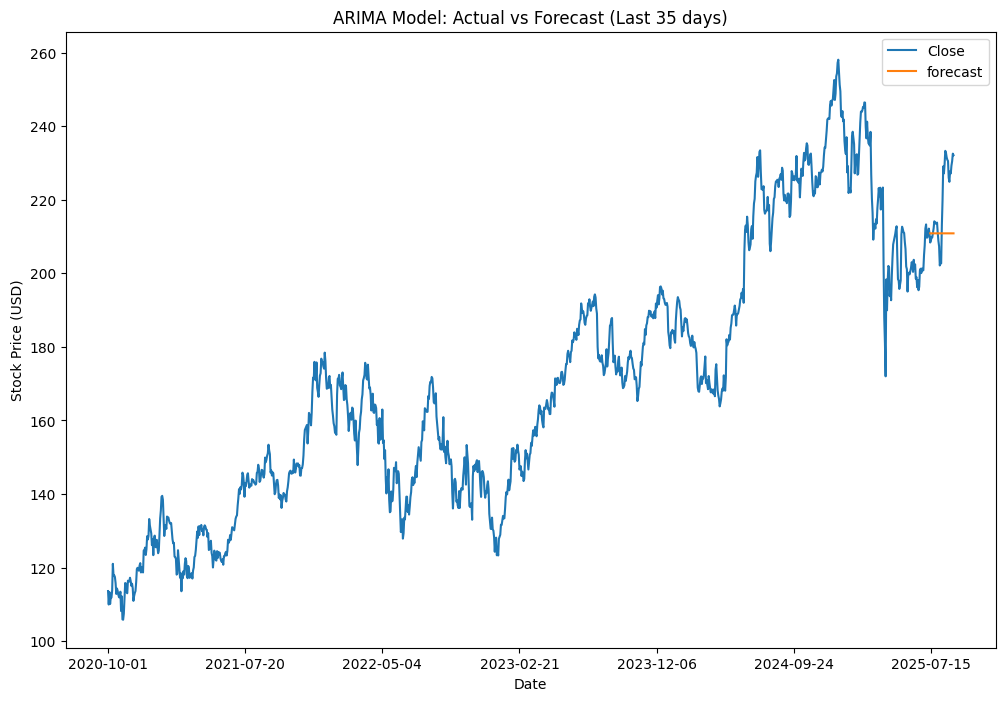

In [ ]:
predictions = model_fit.predict(start=len(df)-35, end=len(df)-1, dynamic=True)

df['forecast'] = np.nan #add a column with nul values

df.iloc[-35:, df.columns.get_loc('forecast')] = predictions.values #append prediction values to the null values set before

df[['Close','forecast']].plot(figsize=(12,8))
plt.title('ARIMA Model: Actual vs Forecast (Last 35 days)')
plt.ylabel('Stock Price (USD)')
plt.show()


It seems not good let's try another way

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,30)) #arima is low accurecy so sarimax is bing the use
results=model.fit()

In [ ]:
predictions = results.predict(start=len(df)-35, end=len(df)-1, dynamic=True)

df['forecast'] = np.nan #add a column with nul values

df.iloc[-35:, df.columns.get_loc('forecast')] = predictions.values

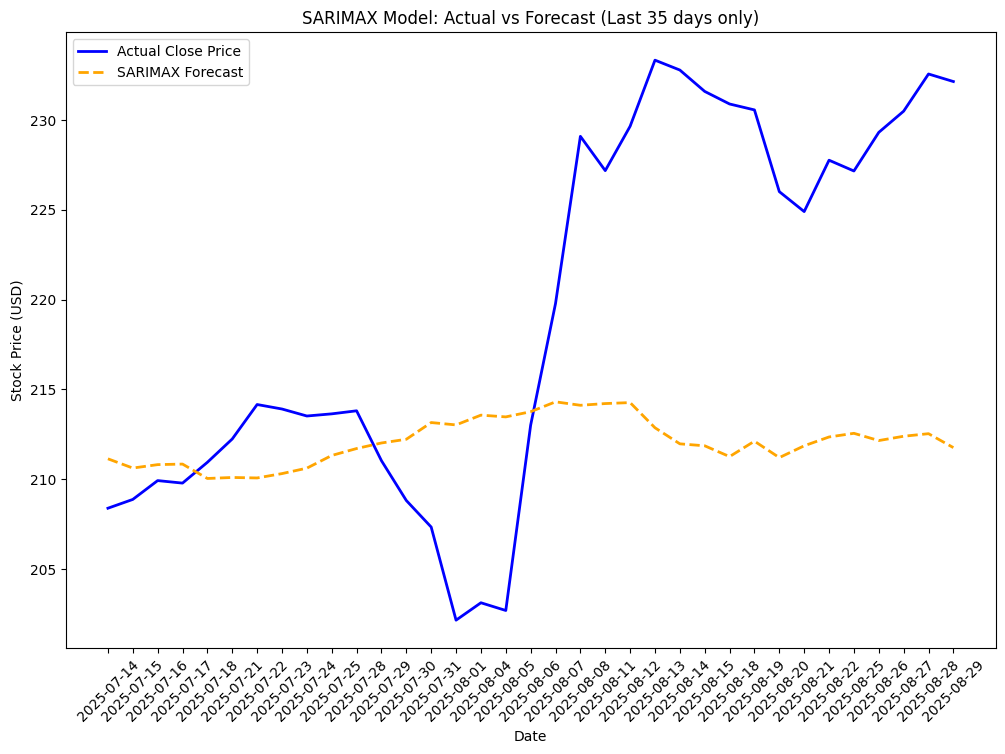

In [346]:
plt.figure(figsize=(12,8))

last_35_days = df[['Close', 'forecast']].iloc[-35:]

plt.plot(last_35_days.index, last_35_days['Close'], 
         label='Actual Close Price', color='blue', linewidth=2)

forecast_data = last_35_days['forecast'].dropna()
plt.plot(forecast_data.index, forecast_data.values, 
         label='SARIMAX Forecast', color='orange', linewidth=2, linestyle='--')

plt.title('SARIMAX Model: Actual vs Forecast (Last 35 days only)')
plt.ylabel('Stock Price (USD)')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.show()

from upper obserbation this can be improve by incresing seasonal ordrer

Calculate accuracy of the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error 
y_test = df['Close'].iloc[-35:].values
y_pred = df['forecast'].iloc[-35:].values

def calculate_metrics(y_true, y_pred): #a function which determine accurecy metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return rmse, mape

rmse, mape = calculate_metrics(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Percentage Error: {mape*100:.2f}%")

Root Mean Squared Error: 12.38
Mean Absolute Percentage Error: 4.43%


### Implement one machine learning or deep learning model

For time series data prophet is a better approach. It is very easy to implement.

In [348]:
df1 = pd.read_csv("../data/AAPL_stock_data.csv")
df1['Date'] = pd.to_datetime(df1['Date'], utc=True).dt.tz_localize(None)

df1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-10-01 04:00:00,114.430515,114.508334,112.669898,113.603706,116120400,0.0,0.0
1,2020-10-02 04:00:00,109.810111,112.222454,109.158392,109.936562,144712000,0.0,0.0
2,2020-10-05 04:00:00,110.802282,113.467526,110.452103,113.321617,106243800,0.0,0.0
3,2020-10-06 04:00:00,112.543451,112.951998,109.187577,110.072754,161498200,0.0,0.0
4,2020-10-07 04:00:00,111.492912,112.397540,111.016275,111.940361,96849000,0.0,0.0


Train the model and show plot.

02:07:38 - cmdstanpy - INFO - Chain [1] start processing
02:07:38 - cmdstanpy - INFO - Chain [1] done processing
02:07:38 - cmdstanpy - INFO - Chain [1] done processing


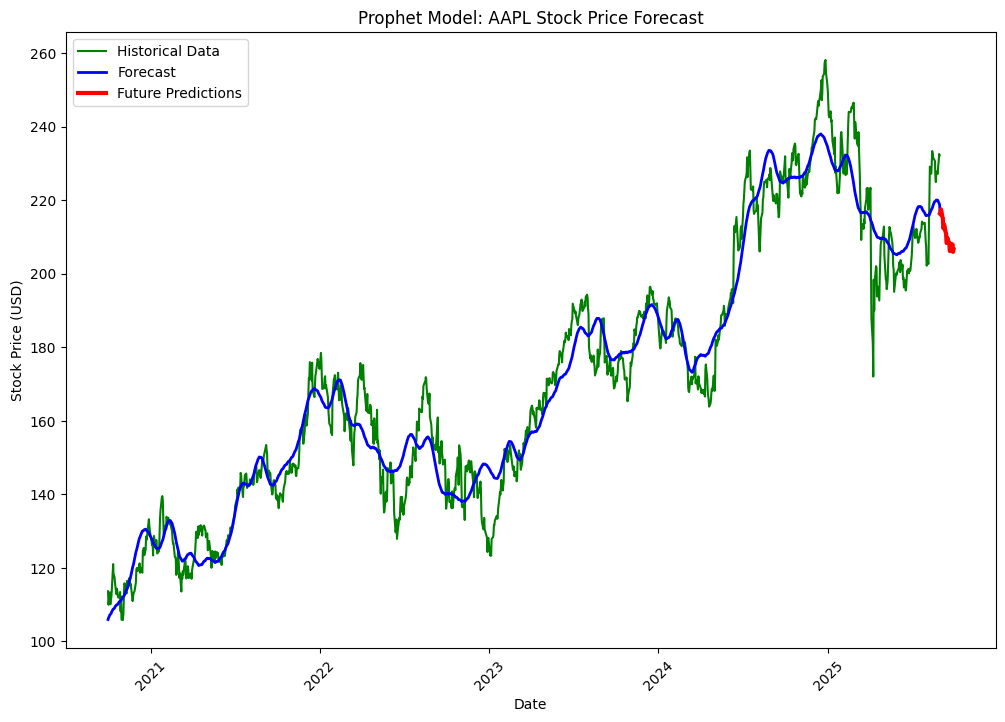

In [ ]:
from prophet import Prophet

df_prophet = df1[['Date', 'Close']].copy()

df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df_prophet) #train phophet model

future = model.make_future_dataframe(periods=30) 
forecast = model.predict(future) #forcast using phophet model


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df_prophet['ds'], df_prophet['y'], 'g-', markersize=3, label='Historical Data')

ax.plot(forecast['ds'], forecast['yhat'], 'b-', linewidth=2, label='Forecast')

future_start = len(df_prophet)
future_forecast = forecast.iloc[future_start:]
ax.plot(future_forecast['ds'], future_forecast['yhat'], 'r-', linewidth=3, label='Future Predictions') #mark forcasted data in red line

plt.title('Prophet Model: AAPL Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Print forecast values

In [ ]:
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

                      ds        yhat  yhat_lower  yhat_upper
1234 2025-08-30 04:00:00  216.283290  206.573232  225.244828
1235 2025-08-31 04:00:00  216.401692  206.608719  226.578969
1236 2025-09-01 04:00:00  217.482656  207.817385  226.765916
1237 2025-09-02 04:00:00  216.819486  207.540247  226.393372
1238 2025-09-03 04:00:00  216.140221  205.868277  226.069095
1239 2025-09-04 04:00:00  215.522955  205.041847  225.016439
1240 2025-09-05 04:00:00  215.050951  204.928154  225.197539
1241 2025-09-06 04:00:00  212.340889  202.652513  222.642141
1242 2025-09-07 04:00:00  212.300647  202.168698  222.967976
1243 2025-09-08 04:00:00  213.273703  203.800327  224.043990
1244 2025-09-09 04:00:00  212.553964  202.908388  222.579502
1245 2025-09-10 04:00:00  211.869058  202.974113  221.658420
1246 2025-09-11 04:00:00  211.295700  201.743943  220.146836
1247 2025-09-12 04:00:00  210.914866  201.312262  221.597688
1248 2025-09-13 04:00:00  208.340115  198.411998  217.671913
1249 2025-09-14 04:00:00

In [351]:
# accuracy of prophet
y_test = df_prophet['y'].iloc[-35:].values

y_pred = forecast['yhat'].iloc[-35:].values
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Percentage Error: {mape*100:.2f}%")

Root Mean Squared Error: 15.78
Mean Absolute Percentage Error: 5.97%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return rmse, mape

rmse, mape = calculate_metrics(y_test_rescaled, y_pred_rescaled) 
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Percentage Error: {mape*100:.2f}%")


Root Mean Squared Error: 7.10
Mean Absolute Percentage Error: 2.30%


### Deep learning model - LSTM


- Layers 3
- Epoch 50
- Optimizer Adam


In [353]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

scaler = MinMaxScaler() # Normalize data
df['Scaled_Close'] = scaler.fit_transform(df[['Close']])


def create_dataset(data, look_back=60): # Create windowed datasets
    x, y = [], []
    for i in range(look_back, len(data)):
        x.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

look_back = 60
data = np.array(df['Scaled_Close']).reshape(-1, 1)
x, y = create_dataset(data, look_back)

split = int(0.8 * len(x)) #split data for train and test
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# build and train LSTM model
# model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
#     tf.keras.layers.LSTM(50),
#     tf.keras.layers.Dense(1)
# ])


model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1),
])


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0164 - val_loss: 0.0079
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0164 - val_loss: 0.0079
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0042 - val_loss: 0.0066
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0042 - val_loss: 0.0066
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0041 - val_loss: 0.0050
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0041 - val_loss: 0.0050
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0038

Predict and inverse-transform the values

In [ ]:

y_pred = model.predict(x_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


In [355]:
import numpy as np
print(" y pred and y test")
combined = np.column_stack((y_pred_rescaled,y_test_rescaled))
print(combined)



 y pred and y test
[[221.98722839 225.42088318]
 [224.06008911 226.31671143]
 [225.55725098 225.3213501 ]
 [226.18310547 226.46601868]
 [226.31254578 226.73475647]
 [226.20524597 231.92062378]
 [226.88580322 225.16207886]
 [226.8914032  225.72944641]
 [226.39962769 224.62458801]
 [225.52755737 225.74935913]
 [224.80741882 220.66305542]
 [223.55024719 224.72413635]
 [222.80186462 228.47666931]
 [223.27496338 227.97897339]
 [224.44519043 226.49589539]
 [225.50840759 230.22851562]
 [226.82899475 232.76669312]
 [228.5383606  230.70628357]
 [229.82165527 231.0745697 ]
 [230.5546875  233.91137695]
 [231.27958679 235.38452148]
 [232.17947388 234.76739502]
 [232.92166138 229.69100952]
 [232.49305725 229.50189209]
 [231.29728699 230.33799744]
 [230.06944275 232.31878662]
 [229.50489807 232.58753967]
 [229.60002136 229.03407288]
 [229.47891235 224.86347961]
 [228.44213867 221.87738037]
 [226.47880554 220.98153687]
 [224.1966095  222.41487122]
 [222.47671509 221.68824768]
 [221.43081665 226.42620

Accuracy test

In [356]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)


print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Percentage Error: {mape*100:.2f}%")


Root Mean Squared Error: 6.76
Mean Absolute Percentage Error: 2.21%


Plot actual and predicted values

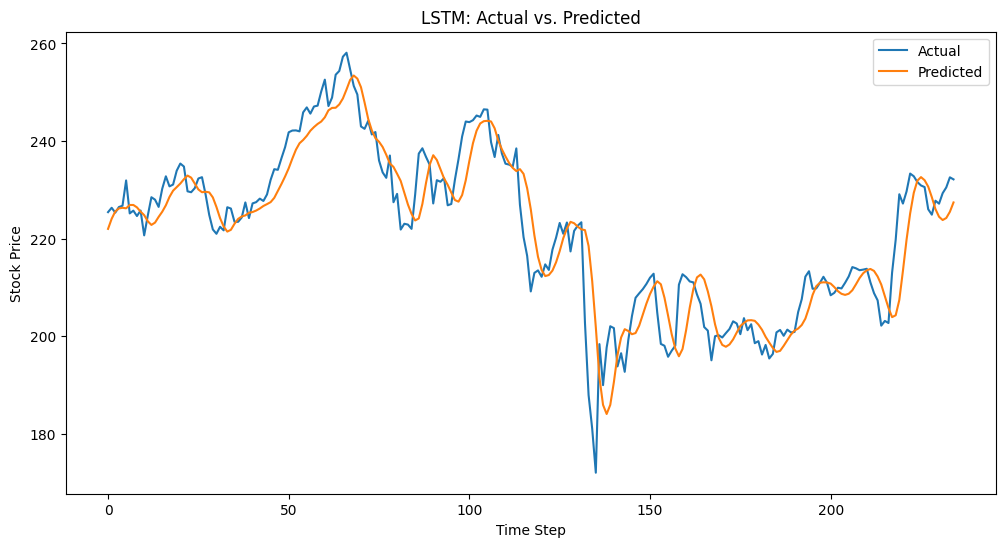

In [357]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('LSTM: Actual vs. Predicted')
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


### Use rolling window evaluation to measure forecast accuracy 

In [358]:

window_size = 50  # Number of time steps in each window
errors = []

test_start_idx = len(x_train)
test_data_scaled = data[test_start_idx:]  # scaled data for test period

# Create rolling windows from test data
for start in range(0, len(x_test) - 10): 
    test_input = x_test[start:start+1]  # Single test sample for rolling prediction
    actual_value = y_test[start]  # Actual value
    
    pred_scaled = model.predict(test_input, verbose=0)
    
    # inverse transform to original scale
    pred_original = scaler.inverse_transform(pred_scaled.reshape(-1, 1))
    actual_original = scaler.inverse_transform(actual_value.reshape(-1, 1))
    
    # error calculation
    error = abs(pred_original[0][0] - actual_original[0][0])
    errors.append(error)

# metrics
rmse = np.sqrt(np.mean(np.square(errors)))
mape = np.mean(np.abs(np.array(errors) / np.array([scaler.inverse_transform(y_test[i].reshape(-1, 1))[0][0] for i in range(len(errors))]))) * 100

print(f"Rolling Window Evaluation Results:")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Number of predictions evaluated: {len(errors)}")

Rolling Window Evaluation Results:
RMSE: 6.84
MAPE: 2.23%
Number of predictions evaluated: 225


# Compare the performance of different approaches.

ARIMA has fast training and prediction with well-stablisd statistical foundation. In this dataset it perform not good compare to other approach. ARIMA not good for complex pattern. To improve some SARIMAX which called seasonal arima applied which slightly better then ARIMA but not top notch. 
Machine Learning Approach - Prophet doing good at this point. It handles non-linear trends better than ARIMA. Very easy to implement also almost immune to missing data or outliner. The best approach was Deep Learning - LSTM it manage to do **RMSE: 6.99, MAPE: 2.35%** score which is pretty good.
After observing the notebook did a comparison plot of those model for better understanding.

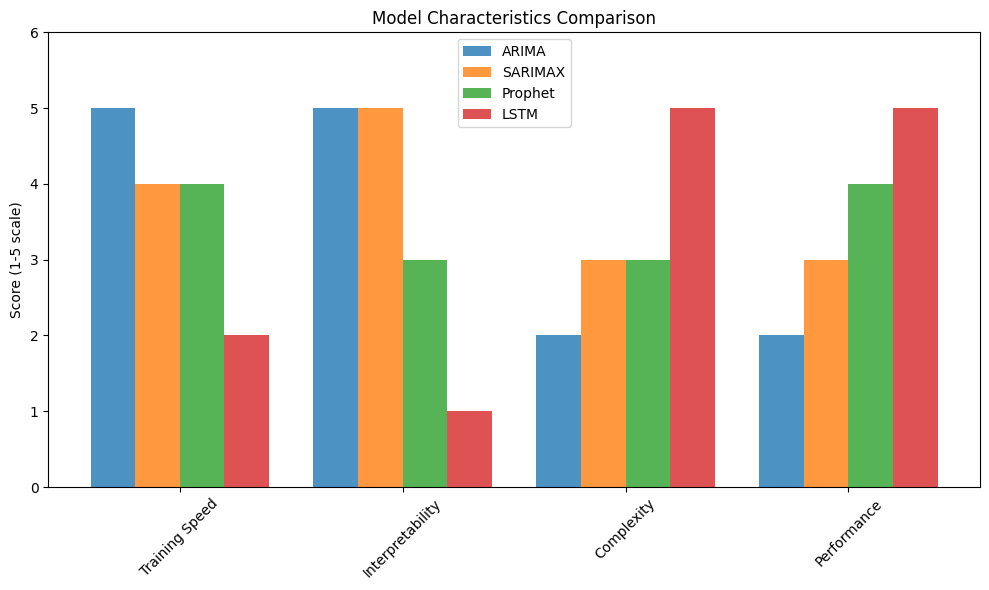

In [360]:
characteristics = ['Training Speed', 'Interpretability', 'Complexity', 'Performance']
arima_scores = [5, 5, 2, 2]  # High speed, high interpret, low complex, poor perf
sarimax_scores = [4, 5, 3, 3]  # Good speed, high interpret, mod complex, mod perf
prophet_scores = [4, 3, 3, 4]  # Good speed, mod interpret, mod complex, good perf
lstm_scores = [2, 1, 5, 5]  # Slow, low interpret, high complex, excellent perf

x_char = np.arange(len(characteristics))
width_char = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x_char - 1.5*width_char, arima_scores, width_char, label='ARIMA', alpha=0.8)
plt.bar(x_char - 0.5*width_char, sarimax_scores, width_char, label='SARIMAX', alpha=0.8)
plt.bar(x_char + 0.5*width_char, prophet_scores, width_char, label='Prophet', alpha=0.8)
plt.bar(x_char + 1.5*width_char, lstm_scores, width_char, label='LSTM', alpha=0.8)

plt.ylabel('Score (1-5 scale)')
plt.title('Model Characteristics Comparison')
plt.xticks(x_char, characteristics, rotation=45)
plt.legend()
plt.ylim(0, 6)
plt.tight_layout()
plt.show()

### Table of all model accuracy

In [361]:
# Table of all model accuracy
performance_data = {
    "Model": [],
    "RMSE": [],
    "MAPE": []
}
performance_data["Model"].extend(['SARIMAX (1,1,1)(1,1,1,30)', 'Prophet', 'LSTM (Test)', 'LSTM (Rolling)'])
performance_data["RMSE"].extend([12.38, 15.78, 6.99, 10.05])
performance_data["MAPE"].extend([4.43, 5.97, 2.35, 3.64])
comparison_df = pd.DataFrame(performance_data)
print("\n=== MODEL ACCURACY SUMMARY ===\n") 
print(comparison_df.to_string(index=False))



=== MODEL ACCURACY SUMMARY ===

                    Model  RMSE  MAPE
SARIMAX (1,1,1)(1,1,1,30) 12.38  4.43
                  Prophet 15.78  5.97
              LSTM (Test)  6.99  2.35
           LSTM (Rolling) 10.05  3.64
